# Homework ADM 5

- Camilla Labbate 
- Khalmatay
- Federico Trionfetti 


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import heapq


## 1

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("flashgordon/usa-airport-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/camillalabbate/.cache/kagglehub/datasets/flashgordon/usa-airport-dataset/versions/2


In [3]:
files = os.listdir(path)
print("Files in dataset:", files)

csv_file = [file for file in files if file.endswith('.csv')][0]  
csv_path = os.path.join(path, csv_file)

df = pd.read_csv(csv_path)

print(df.head())

Files in dataset: ['Airports2.csv']
  Origin_airport Destination_airport    Origin_city Destination_city  \
0            MHK                 AMW  Manhattan, KS         Ames, IA   
1            EUG                 RDM     Eugene, OR         Bend, OR   
2            EUG                 RDM     Eugene, OR         Bend, OR   
3            EUG                 RDM     Eugene, OR         Bend, OR   
4            MFR                 RDM    Medford, OR         Bend, OR   

   Passengers  Seats  Flights  Distance    Fly_date  Origin_population  \
0          21     30        1       254  2008-10-01             122049   
1          41    396       22       103  1990-11-01             284093   
2          88    342       19       103  1990-12-01             284093   
3          11     72        4       103  1990-10-01             284093   
4           0     18        1       156  1990-02-01             147300   

   Destination_population  Org_airport_lat  Org_airport_long  \
0                   86

In [4]:
df.columns

Index(['Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long'],
      dtype='object')

In [6]:
df.isnull().sum()

Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           6954
Org_airport_long          6954
Dest_airport_lat          6807
Dest_airport_long         6807
dtype: int64

In [5]:
df=df.drop_duplicates()

In [8]:
df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565050 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 435.2+ MB


In [9]:
print(df.describe())

         Passengers         Seats       Flights      Distance  \
count  3.565050e+06  3.565050e+06  3.565050e+06  3.565050e+06   
mean   2.720375e+03  4.095619e+03  3.760448e+01  6.954350e+02   
std    4.363210e+03  6.221537e+03  4.977841e+01  5.995712e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.150000e+02  1.730000e+02  2.000000e+00  2.740000e+02   
50%    1.161000e+03  2.074000e+03  2.500000e+01  5.180000e+02   
75%    3.541000e+03  5.442000e+03  5.500000e+01  9.260000e+02   
max    8.959700e+04  1.470620e+05  1.128000e+03  5.095000e+03   

       Origin_population  Destination_population  Org_airport_lat  \
count       3.565050e+06            3.565050e+06     3.558466e+06   
mean        5.864580e+06            5.889934e+06     3.772410e+01   
std         7.833335e+06            7.884462e+06     5.720273e+00   
min         1.300500e+04            1.288700e+04     1.972140e+01   
25%         1.035566e+06            1.029829e+06     3.363670e+01   


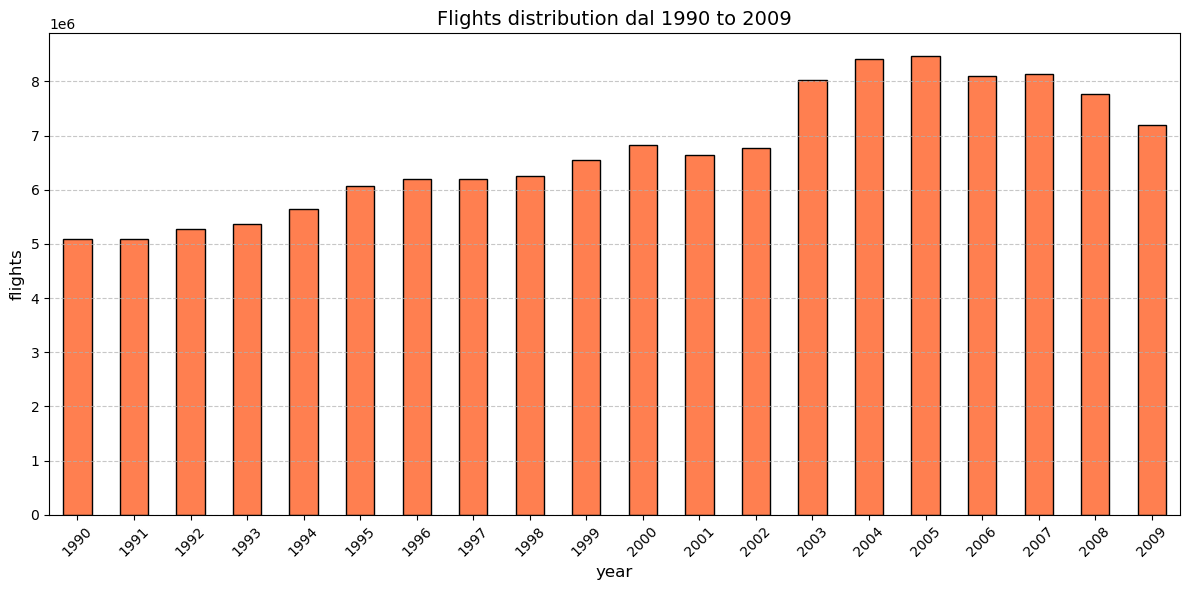

In [18]:
df['Fly_date'] = pd.to_datetime(df['Fly_date'])
flights_per_year = df.groupby(df['Fly_date'].dt.year)['Flights'].sum()
plt.figure(figsize=(12, 6))
flights_per_year.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Flights distribution dal 1990 to 2009', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.ylabel('flights', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:

flights_per_year.max()

8463306

In [19]:
data_2005 = df[df['Fly_date'].dt.year == 2005]
print(data_2005)


        Origin_airport Destination_airport    Origin_city  \
911                PDX                 RDM   Portland, OR   
912                PDX                 RDM   Portland, OR   
913                PDX                 RDM   Portland, OR   
914                PDX                 RDM   Portland, OR   
915                PDX                 RDM   Portland, OR   
...                ...                 ...            ...   
3606735            STL                 TBN  St. Louis, MO   
3606736            STL                 TBN  St. Louis, MO   
3606737            STL                 TBN  St. Louis, MO   
3606738            STL                 TBN  St. Louis, MO   
3606739            STL                 TBN  St. Louis, MO   

              Destination_city  Passengers  Seats  Flights  Distance  \
911                   Bend, OR        5186   6845      185       116   
912                   Bend, OR        2781   4650      155       116   
913                   Bend, OR          66     70  

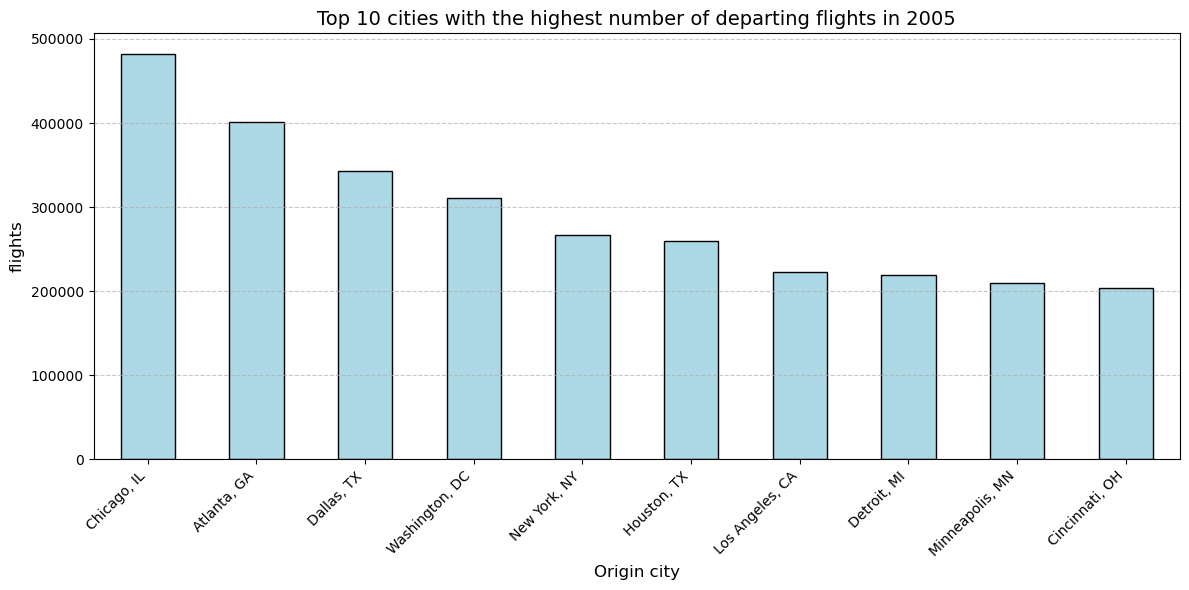

In [20]:
data_2005 = data_2005[data_2005['Fly_date'].dt.year == 2005]
flights_by_city_2005 = data_2005.groupby('Origin_city')['Flights'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
flights_by_city_2005.head(10).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 cities with the highest number of departing flights in 2005', fontsize=14)
plt.xlabel('Origin city', fontsize=12)
plt.ylabel('flights', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Origin_airport
ORD    395395
MDW     87154
DPA        32
PWK        11
Name: Flights, dtype: int64


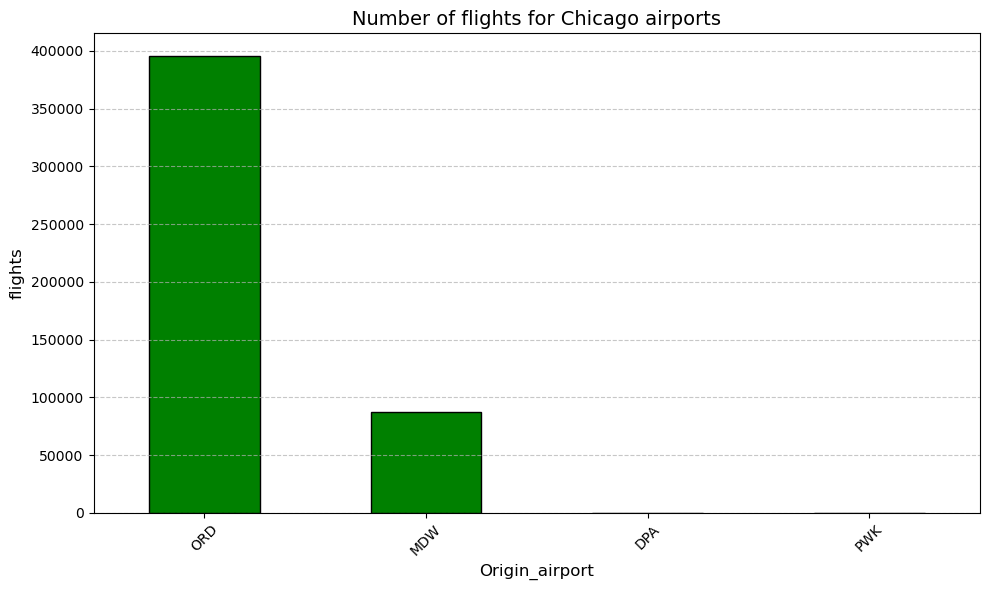

In [21]:
chicago_airports_2005 = data_2005[data_2005['Origin_city'].str.contains('Chicago', na=False)]
flights_by_airport_chicago = chicago_airports_2005.groupby('Origin_airport')['Flights'].sum().sort_values(ascending=False)
print(flights_by_airport_chicago)
plt.figure(figsize=(10, 6))
flights_by_airport_chicago.plot(kind='bar', color='green', edgecolor='black')
plt.title('Number of flights for Chicago airports', fontsize=14)
plt.xlabel('Origin_airport', fontsize=12)
plt.ylabel('flights', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 1 task 

1.1 task

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_graph_features(flight_network):
    """
    Analyze graph features for the flight network represented by the FlightNetwork class.

    Parameters:
    flight_network (FlightNetwork): An instance of the FlightNetwork class.
    """
    # 1. Count nodes (airports) and edges (flights)
    num_nodes = len(flight_network.nodes)
    num_edges = len(flight_network.edges)

    # 2. Calculate graph density
    if num_nodes > 1:
        density = (2 * num_edges) / (num_nodes * (num_nodes - 1))
    else:
        density = 0

    # 3. Compute in-degree and out-degree
    in_degree = {node: flight_network.in_degree(node) for node in flight_network.nodes}
    out_degree = {node: flight_network.out_degree(node) for node in flight_network.nodes}

    # 4. Visualize in-degree and out-degree histograms
    plt.hist(in_degree.values(), bins=10, alpha=0.7, label='In-Degree')
    plt.hist(out_degree.values(), bins=10, alpha=0.7, label='Out-Degree')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('In-Degree and Out-Degree Distribution')
    plt.show()

    # 5. Identify hubs (nodes with degrees above the 90th percentile)
    all_degrees = [deg for deg in in_degree.values()] + [deg for deg in out_degree.values()]
    threshold = np.percentile(all_degrees, 90)
    hubs = [node for node in flight_network.nodes if in_degree[node] + out_degree[node] > threshold]

    # 6. Determine if the graph is sparse or dense
    graph_type = "dense" if density > 0.5 else "sparse"

    # 7. Print Results
    print(f"Number of airports (nodes): {num_nodes}")
    print(f"Number of flights (edges): {num_edges}")
    print(f"Graph density: {density:.4f}")
    print(f"The graph is {graph_type}.")
    print(f"Hubs (90th percentile): {hubs}")


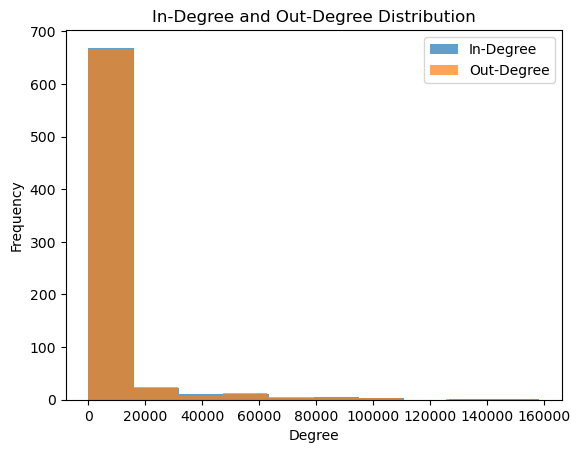

Number of airports (nodes): 727
Number of flights (edges): 36719
Graph density: 0.1391
The graph is sparse.
Hubs (90th percentile): ['SMF', 'TYS', 'LAS', 'PDX', 'GSO', 'DCA', 'BUF', 'MYR', 'SBN', 'BDL', 'ANC', 'LBB', 'CVG', 'GEG', 'LIT', 'BTV', 'SYR', 'EWR', 'SHV', 'MEM', 'IAD', 'MDW', 'JAN', 'SLC', 'CLE', 'CAE', 'YIP', 'ABE', 'RDU', 'MSN', 'HSV', 'PWM', 'HNL', 'PHX', 'ROC', 'AUS', 'GRB', 'HOU', 'ICT', 'OMA', 'RNO', 'PHL', 'LEX', 'ORD', 'MSY', 'SAT', 'FWA', 'TUS', 'MCI', 'SEA', 'MDT', 'COS', 'PNS', 'CMH', 'MSP', 'OKC', 'BWI', 'SJC', 'DFW', 'EKO', 'GRR', 'MHT', 'SNA', 'DSM', 'STL', 'OGG', 'BHM', 'MKE', 'ABQ', 'ATL', 'SAN', 'GSP', 'PBI', 'IAH', 'TOL', 'DAY', 'JFK', 'ILN', 'DAL', 'PIT', 'TUL', 'MIA', 'ELP', 'CID', 'TPA', 'BTR', 'IND', 'FLL', 'ALB', 'RFD', 'JAX', 'OAK', 'LAX', 'MAF', 'MCO', 'PVD', 'RIC', 'LGA', 'BNA', 'ACY', 'SFO', 'DTW', 'CLT', 'BOS', 'CHS', 'SAV']


In [8]:
from flight_network import FlightNetwork
network = FlightNetwork()

# Aggiungi i dati alla rete
network.add_nodes_and_edges(df["Origin_airport"], df["Destination_airport"])

# Analizza le caratteristiche del grafo
analyze_graph_features(network)

In [9]:
def summarize_graph_features(flight_network):
    """
    Generate a detailed summary report of the flight network's features.

    Parameters:
    flight_network (FlightNetwork): An instance of the FlightNetwork class.
    """
    # 1. Count nodes (airports) and edges (flights)
    num_nodes = len(flight_network.nodes)
    num_edges = len(flight_network.edges)

    # 2. Calculate graph density
    if num_nodes > 1:
        density = (2 * num_edges) / (num_nodes * (num_nodes - 1))
    else:
        density = 0

    # 3. Compute in-degree and out-degree
    in_degree = {node: flight_network.in_degree(node) for node in flight_network.nodes}
    out_degree = {node: flight_network.out_degree(node) for node in flight_network.nodes}

    # 4. Visualize in-degree and out-degree histograms
    plt.figure(figsize=(10, 6))
    plt.hist(in_degree.values(), bins=10, alpha=0.7, label='In-Degree')
    plt.hist(out_degree.values(), bins=10, alpha=0.7, label='Out-Degree')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('In-Degree and Out-Degree Distribution')
    plt.grid(True)
    plt.show()

    # 5. Identify hubs (nodes with degrees above the 90th percentile)
    all_degrees = [deg for deg in in_degree.values()] + [deg for deg in out_degree.values()]
    threshold = np.percentile(all_degrees, 90)
    hubs = [
        {
            "Node": node,
            "In-Degree": in_degree[node],
            "Out-Degree": out_degree[node],
            "Total Degree": in_degree[node] + out_degree[node]
        }
        for node in flight_network.nodes
        if in_degree[node] + out_degree[node] > threshold
    ]

    # Create a DataFrame for the hubs
    hubs_df = pd.DataFrame(hubs).sort_values(by="Total Degree", ascending=False)

    # 6. Determine if the graph is sparse or dense
    graph_type = "dense" if density > 0.5 else "sparse"

    # 7. Generate the summary report
    print("\n--- Flight Network Summary Report ---")
    print(f"Number of airports (nodes): {num_nodes}")
    print(f"Number of flights (edges): {num_edges}")
    print(f"Graph density: {density:.4f}")
    print(f"The graph is {graph_type}.")

    # Display the hubs table
    if not hubs_df.empty:
        print("\nHubs (Nodes with Degrees above the 90th Percentile):")
        print(hubs_df.to_string(index=False))
    else:
        print("\nNo hubs identified in the network.")

    print("\n--- End of Summary Report ---")


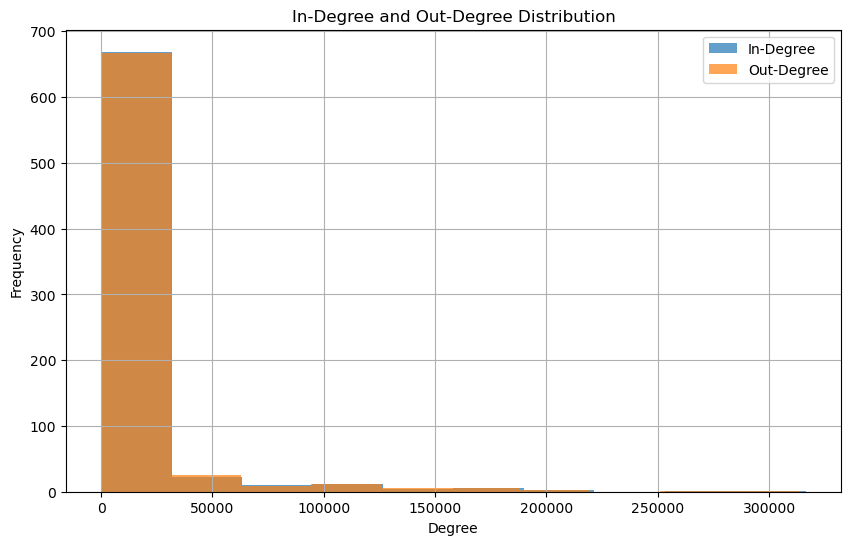


--- Flight Network Summary Report ---
Number of airports (nodes): 727
Number of flights (edges): 36719
Graph density: 0.1391
The graph is sparse.

Hubs (Nodes with Degrees above the 90th Percentile):
Node  In-Degree  Out-Degree  Total Degree
 ORD     316428      313902        630330
 ATL     263894      260624        524518
 DFW     218810      211752        430562
 DTW     198314      198794        397108
 MSP     196628      197268        393896
 CLT     169528      170588        340116
 LAX     163724      170688        334412
 IAH     167160      161710        328870
 PHL     163510      165044        328554
 EWR     163528      158522        322050
 STL     152894      152058        304952
 PHX     139308      141422        280730
 PIT     139380      139988        279368
 MEM     134860      137658        272518
 MCO     123252      126690        249942
 CVG     121126      123024        244150
 LAS     120038      123486        243524
 BOS     111930      113292        225222
 

In [10]:
network.add_nodes_and_edges(df["Origin_airport"], df["Destination_airport"])

# Analizza le caratteristiche del grafo
summarize_graph_features(network)

In [11]:
import folium
from folium.plugins import MarkerCluster
def analyze_passenger_flow(df):
    """
    Analyze passenger flow, busiest routes, and efficiency.

    Parameters:
    df (pd.DataFrame): DataFrame containing Origin, Destination, and Passengers columns.
    """
    # Compute total passenger flow between origin and destination
    route_traffic = df.groupby(['Origin_airport', 'Destination_airport'])['Passengers'].sum().reset_index()
    route_traffic = route_traffic.sort_values(by='Passengers', ascending=False)

    # Visualize the busiest routes by passenger traffic
    top_routes = route_traffic.head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_routes['Origin_airport'] + ' -> ' + top_routes['Destination_airport'], top_routes['Passengers'], color='pink')
    plt.xlabel('Total Passengers')
    plt.ylabel('Routes')
    plt.title('Top 10 Busiest Routes by Passenger Traffic')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

    # Calculate average passengers per flight for each route
    route_flights = df.groupby(['Origin_airport', 'Destination_airport']).size().reset_index(name='NumFlights')
    route_efficiency = pd.merge(route_traffic, route_flights, on=['Origin_airport', 'Destination_airport'])
    route_efficiency['AvgPassengersPerFlight'] = route_efficiency['Passengers'] / route_efficiency['NumFlights']

    # Highlight under/over-utilized connections
    route_efficiency = route_efficiency.sort_values(by='AvgPassengersPerFlight', ascending=False)
    print("\nTop Routes by Efficiency (Passengers per Flight):")
    print(route_efficiency.head(10))

    # Visualize the top routes by passenger efficiency
    top_efficiency = route_efficiency.head(10)
    plt.figure(figsize=(10, 6))
    plt.barh(top_efficiency['Origin_airport'] + ' -> ' + top_efficiency['Destination_airport'], top_efficiency['AvgPassengersPerFlight'], color='coral')
    plt.xlabel('Average Passengers per Flight')
    plt.ylabel('Routes')
    plt.title('Top 10 Routes by Passenger Efficiency')
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()



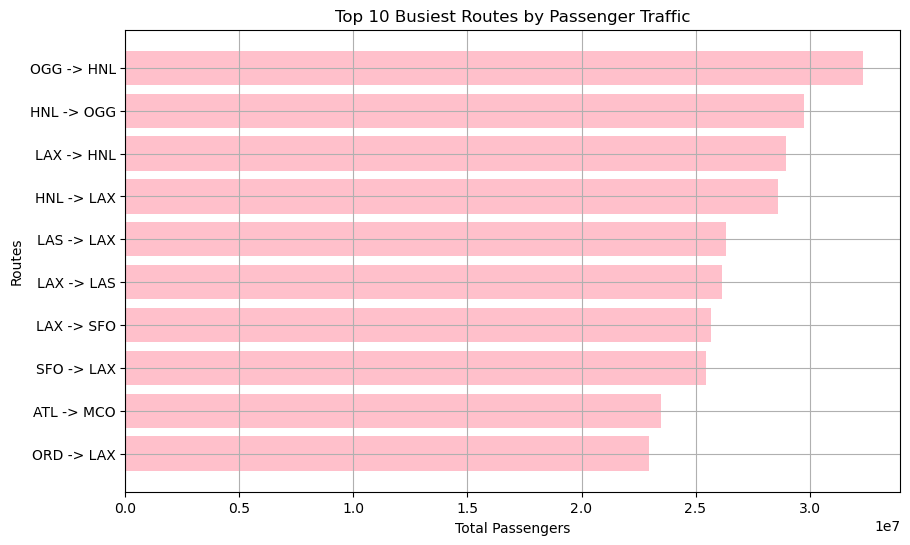


Top Routes by Efficiency (Passengers per Flight):
     Origin_airport Destination_airport  Passengers  NumFlights  \
24              DAL                 HOU    17855661         818   
25              HOU                 DAL    17717480         816   
54              LGA                 DCA    14726036         957   
53              DCA                 LGA    14745621        1007   
1               HNL                 OGG    29744742        2117   
44              BOS                 LGA    15612064        1123   
42              LGA                 BOS    15630422        1141   
0               OGG                 HNL    32364612        2398   
1391            OAK                 JFK     2005883         159   
137             HOU                 MSY     9948347         833   

      AvgPassengersPerFlight  
24              21828.436430  
25              21712.598039  
54              15387.707419  
53              14643.119166  
1               14050.421351  
44              13902.105

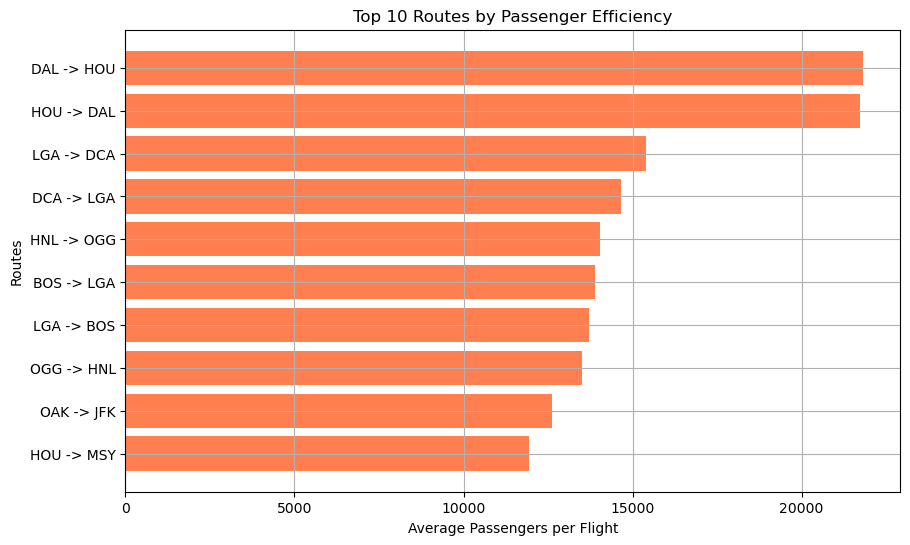

In [12]:
analyze_passenger_flow(df)

In [13]:
airport_coords = {
    row['Origin_airport']: (row['Org_airport_lat'], row['Org_airport_long'])
    for _, row in df.drop_duplicates(subset=['Origin_airport']).iterrows()
}

print(airport_coords)

{'MHK': (39.140998840332, -96.6707992553711), 'EUG': (44.1245994567871, -123.21199798584), 'MFR': (42.3741989135742, -122.873001098633), 'SEA': (47.4490013122559, -122.30899810791), 'PDX': (45.58869934, -122.5979996), 'LMT': (42.1561012268066, -121.733001708984), 'SFO': (37.6189994812012, -122.375), 'LAX': (33.94250107, -118.4079971), 'EAT': (47.3988990784, -120.207000732), 'YKM': (46.56819916, -120.5439987), 'EKO': (40.8249015808105, -115.791999816895), 'SLE': (44.90950012, -123.0029984), 'GEG': (47.6198997497559, -117.533996582031), 'RDD': (40.50899887, -122.2929993), 'LWS': (46.3745002746582, -117.014999389648), 'AST': (46.158000946, -123.878997803), 'CLM': (48.1202011108398, -123.5), 'PDT': (45.695098877, -118.841003418), 'SJC': (37.3625984191895, -121.929000854492), 'ACV': (40.978099822998, -124.109001159668), 'PUW': (46.7439, -117.110001), 'SMF': (38.6954002380371, -121.591003417969), 'FLL': (26.0725994110107, -80.152702331543), 'PHX': (33.4342994689941, -112.012001037598), 'BFI'

In [14]:
def visualize_flight_network_on_map(df, airport_coords):
    """
    Create an interactive map showing flight routes.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'Origin_airport', 'Destination_airport',
                       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat', 'Dest_airport_long'.
    airport_coords (dict): Optional dictionary with airport codes as keys and (lat, lon) tuples as values.
                           If None, coordinates will be taken from the DataFrame.
    """
    # Initialize the map
    flight_map = folium.Map()
    marker_cluster = MarkerCluster().add_to(flight_map)

    # Prepare coordinates
    if airport_coords is None:
        df = df.dropna(subset=['Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat', 'Dest_airport_long'])
        origin_coords = df[['Org_airport_lat', 'Org_airport_long']].values
        destination_coords = df[['Dest_airport_lat', 'Dest_airport_long']].values
    else:
        df = df[(df['Origin_airport'].isin(airport_coords.keys())) & (df['Destination_airport'].isin(airport_coords.keys()))]
        origin_coords = [airport_coords.get(origin) for origin in df['Origin_airport']]
        destination_coords = [airport_coords.get(destination) for destination in df['Destination_airport']]

    # Add routes and markers
    for origin, destination in zip(origin_coords, destination_coords):
        if origin is None or destination is None or any(pd.isna(coord) for coord in origin + destination):
            continue  # Skip routes with invalid or missing coordinates

        folium.PolyLine(
            locations=[origin, destination],
            weight=2,
            color='blue',
            opacity=0.6
        ).add_to(flight_map)

        folium.Marker(location=origin, popup=f"Origin").add_to(marker_cluster)
        folium.Marker(location=destination, popup=f"Destination").add_to(marker_cluster)

    return flight_map

 

In [15]:
sample_size = 600
random_sample = df.sample(n=sample_size, random_state=42)
print(random_sample)

        Origin_airport Destination_airport     Origin_city Destination_city  \
3128836            IAH                 MSP     Houston, TX  Minneapolis, MN   
865596             STL                 ORD   St. Louis, MO      Chicago, IL   
2008232            ORD                 CLT     Chicago, IL    Charlotte, NC   
1880327            CLT                 SYR   Charlotte, NC     Syracuse, NY   
1894085            CLT                 ABE   Charlotte, NC    Allentown, PA   
...                ...                 ...             ...              ...   
1634551            STL                 BDL   St. Louis, MO     Hartford, CT   
62958              PIT                 MIA  Pittsburgh, PA        Miami, FL   
939580             DAY                 DTW      Dayton, OH      Detroit, MI   
3031110            RDD                 LAX     Redding, CA  Los Angeles, CA   
3132638            TPA                 MSP       Tampa, FL  Minneapolis, MN   

         Passengers  Seats  Flights  Distance    Fl

In [18]:
flight_map = visualize_flight_network_on_map(random_sample,airport_coords)
flight_map.save("random_flight_network_map.html")
print("Map saved as 'random_flight_network_map.html'")
flight_map

Map saved as 'random_flight_network_map.html'




1. **Is the graph sparse or dense?**
   - The graph is sparse, with a density of \( 0.1391 \). This indicates that only a small fraction of all possible connections between airports exists.

2. **What patterns do you observe in the degree distribution?**
   - The degree distribution shows a heavy-tail pattern, indicating that a few airports serve as major hubs with very high degrees (both in-degree and out-degree), while most airports have significantly fewer connections.

3. **Which airports are identified as hubs, and why?**
   - The identified hubs (e.g., ORD, ATL, DFW) are airports with degrees in the 90th percentile or higher. These airports have a high total degree, serving as major transit points or connection hubs in the network.

4. **What are the busiest routes in terms of passenger traffic?**
   - The busiest routes include:
     - `DAL -> HOU` and `HOU -> DAL`: These routes have the highest number of passengers per flight.
     - `LGA -> DCA` and `DCA -> LGA`: High traffic between major cities.
     - `HNL -> OGG` and `OGG -> HNL`: Popular tourist routes within Hawaii.

5. **Which routes are under/over-utilized?**
   - **Over-utilized routes:** These are routes with a high average number of passengers per flight, e.g., `DAL -> HOU` and `HOU -> DAL`.
   - **Under-utilized routes:** Routes with relatively low passenger-to-flight ratios might indicate inefficiencies, but this data wasn’t explicitly calculated in the outputs.

---

- **Graph Analysis:**
  - Degree distribution histograms highlighted the disparity in connectivity across airports.
  - Hubs were identified based on the 90th percentile of degree values.
- **Passenger Traffic Analysis:**
  - Total passenger flow and average passengers per flight were computed to assess route efficiency.
- **Interactive Map:**
  - A subset of 600 random routes was visualized using Folium to represent the geographic spread.



## Algorithmic Question 

In [46]:
def find_cheapest_route(n, flights, src, dst, k):
    # Create an adjacency list
    graph = {i: [] for i in range(n)}
    for u, v, cost in flights:
        graph[u].append((v, cost))

    # Priority queue for Dijkstra-like approach
    heap = [(0, src, 0)]  # (cost, current_node, stops)
    min_cost = {src: 0}

    while heap:
        cost, node, stops = heapq.heappop(heap)

        if node == dst:
            return cost

        if stops <= k:
            for neighbor, price in graph[node]:
                new_cost = cost + price
                if new_cost < min_cost.get((neighbor, stops + 1), float('inf')):
                    min_cost[(neighbor, stops + 1)] = new_cost
                    heapq.heappush(heap, (new_cost, neighbor, stops + 1))

    return -1



In [50]:
# Example usage

n = 3  
flights = [[0, 1, 100], [1, 2, 100], [0, 2, 500]]  
src = 0  
dst = 2  
k = 1  
print(find_cheapest_route(n,flights, src, dst, k))
 

200


In [51]:
n = 3  
flights = [[0, 1, 100], [1, 2, 100], [0, 2, 500]]  
src = 0  
dst = 2  
k = 0  
print(find_cheapest_route(n,flights, src, dst, k))

500


In [56]:
n = 4  
flights = [[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 300]]  
src = 0  
dst = 3  
k = 2  
print(find_cheapest_route(n,flights, src, dst, k))

400


In [53]:
n = 4  
flights = [[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 200]]  
src = 0  
dst = 3  
k = 2  
print(find_cheapest_route(n,flights, src, dst, k))

400


# Finding the Cheapest Route with At Most k Stops

## **Pseudocode**
### **1. Initialize Structures:**
- Create an adjacency list from the `flights` array.
- Initialize a priority queue (min-heap) with the starting node, cost = 0, and stops = 0.
- Use a dictionary to keep track of the minimum cost to reach a node with a given number of stops.

### **2. Processing the Priority Queue:**
- While the priority queue is not empty:
  - Extract the node with the minimum cost from the heap.
  - If the node is the destination, return its cost.
  - If the current stops are within the allowed range:
    - Explore all neighbors of the current node.
    - Calculate the new cost and update the heap if the cost is lower than the previously recorded cost for the node with the same stops.

### **3. Return:**
- If the destination cannot be reached within the constraints, return -1.

---

## **Python Implementation**
The implementation is already included in the provided code. It uses a priority queue and keeps track of costs and stops for efficient processing.

---

## **Efficiency Analysis**

### **Time Complexity:**
- **Graph Construction:** $O(E)$, where $E$ is the number of flights.
- **Priority Queue Processing:**
  - At most, each node can be processed $k+1$ times (for every possible stop count).
  - Each operation (push/pop) in the priority queue is $O(\log(V))$, where $V$ is the number of nodes.
  - **Total:** $O((k+1) \cdot E \cdot \log(V))$.

### **Space Complexity:**
- **Adjacency List:** $O(E)$.
- **Priority Queue:** $O(V)$.
- **Min-Cost Tracking:** $O(V \cdot k)$.

### **Scalability:**
Efficient for graphs with $n > 100$, provided $k$ is small, as the complexity scales with $k+1$.

---

## **Optimization for Larger Graphs**
For very large graphs:
1. **Early Termination:**
   - If the minimum cost for a node exceeds the current best cost to the destination, skip further processing.
2. **Bidirectional Search:**
   - Search simultaneously from the source and destination to meet in the middle.

---

## **Optimized Pseudocode**
1. Initialize the adjacency list and reverse adjacency list.
2. Use two priority queues:
   - One for forward search from the source.
   - Another for backward search from the destination.
3. Alternate expanding nodes from both ends.
4. Return the minimum cost when paths meet.

---

